## Student Info

* Student name: Lê Nguyên Khang 
* Student ID: 20120113

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import math

### Câu 1. (2 điểm) Dùng phương pháp Monte Carlo, ước lượng các giá trị sau với sai số chuẩn không quá 0.01.

#### a/

$I = \displaystyle\int_{-\infty}^{\infty} e^{-x^{2}}|cos(x)|dx = \sqrt{\pi}\displaystyle\int_{-\infty}^{\infty}|cos(x)|\frac{1}{\sqrt{\pi}}e^{-x^{2}}dx = \sqrt{\pi}\displaystyle\int_{-\infty}^{\infty}|cos(x)|f_x(x)dx = \sqrt{\pi} E(|cos(X)|) ,\ với\  X \sim N(0, \frac{1}{2})$

$I \approx \sqrt{\pi} * J ,\ với\  J = \frac{1}{n} \displaystyle\sum_{i=1}^{n}|cos(X_i)|,\ X_1,...,X_n \sim N(0, \frac{1}{2})$

In [2]:
N = 10000
X = np.random.normal(0, 1/np.sqrt(2), N)

J_hat = np.mean(np.abs(np.cos(X)))
I_hat = np.sqrt(np.pi)*J_hat
print(f"Uoc luong: {I_hat:.4f}")    

sigma = np.std(np.abs(np.cos(X)))
sigma_J = sigma/np.sqrt(N)
sigma_I = np.sqrt(np.pi)*sigma_J
print(f"Sai so chuan: {sigma_I:.4f}")


Uoc luong: 1.4014
Sai so chuan: 0.0043


#### b/

$I = \displaystyle\int_{-\infty}^{\infty}\displaystyle\int_{-\infty}^{\infty}e^{-\frac{1}{2}(x^{2}+(y+1)^{2}-\frac{x(y-1)}{10})}dxdy 
= \displaystyle\int_{-\infty}^{\infty}\displaystyle\int_{-\infty}^{\infty}e^{-\frac{1}{2}(x^{2})}e^{-\frac{1}{2}(y+1)^{2}}e^{\frac{x(y-1)}{20}}dxdy $

Ta đổi biến y' = y+1, ta được:

$= \displaystyle\int_{-\infty}^{\infty}\displaystyle\int_{-\infty}^{\infty}e^{-\frac{1}{2}x^{2}}e^{-\frac{1}{2}y^{2}}e^{\frac{x(y-2)}{20}}dxdy  
= 2\pi\displaystyle\int_{-\infty}^{\infty}\displaystyle\int_{-\infty}^{\infty}e^{\frac{x(y-2)}{20}}f_x(x)dxf_y(y)dy $

$= 2\pi E(e^{\frac{x(y-2)}{20}}) ,\ với\  X, Y \sim N(0, 1)$

In [3]:
N = 10000
X = np.random.normal(0, 1, N)
Y = np.random.normal(0, 1, N)

J_hat = np.mean(np.exp((X*(Y-2))/20))
I_hat = 2*(np.pi)*J_hat
print(f"Uoc luong: {I_hat:.4f}")

sigma = np.std(np.exp(X*(Y-2)/20))
sigma_J = sigma/np.sqrt(N)
sigma_I = 2*np.pi*sigma_J
print(f"Sai so chuan: {sigma_I:.4f}") 

Uoc luong: 6.3240
Sai so chuan: 0.0071


### Câu 2. (3 điểm) Chọn ngẫu nhiên 2 điểm 𝐴, 𝐵 trong “hình vuông đơn vị 𝐾 chiều” [0, 1]^𝐾. Gọi 𝐷 là khoảng cách giữa 2 điểm 𝐴, 𝐵 và 𝜇, 𝜎 lần lượt là kì vọng và độ lệch chuẩn của 𝐷. Dùng phương pháp Monte Carlo:

#### a/ Với 𝐾 = 2, đưa ra khoảng tin cậy 95% cho ước lượng của 𝜇, 𝜎.

In [4]:
n = 1000
N = 1000
uy = []

for _ in range(N):
    X1 = np.random.uniform(0, 1, n)
    Y1 = np.random.uniform(0, 1, n)
    X2 = np.random.uniform(0, 1, n)
    Y2 = np.random.uniform(0, 1, n)

    uy.append(np.mean(np.sqrt((X1 - X2)**2 + (Y1 - Y2)**2)))

mean = np.mean(uy)
sigma = np.std(uy)/np.sqrt(N)

print(f"Ước lượng: {mean:.4f}")
print(f"Sai số chuấn của 𝜇: {sigma:.5f}")
print(f"Khoảng tin cậy 95% của 𝜇: [{mean - 2 * sigma}, {mean + 2 * sigma}]")

Ước lượng: 0.5216
Sai số chuấn của 𝜇: 0.00025
Khoảng tin cậy 95% của 𝜇: [0.5210528552636488, 0.5220591581518194]


In [5]:
n = 1000
N = 1000
sig = []

for _ in range(N):
    X1 = np.random.uniform(0, 1, n)
    Y1 = np.random.uniform(0, 1, n)
    X2 = np.random.uniform(0, 1, n)
    Y2 = np.random.uniform(0, 1, n)

    sig.append(np.std(np.sqrt((X1 - X2)**2 + (Y1 - Y2)**2)))

mean = np.mean(sig)
sigma = np.std(sig)/np.sqrt(N)

print(f"Ước lượng: {mean:.4f}") 
print(f"Sai số chuấn của 𝜎: {sigma:.5f}")
print(f"Khoảng tin cậy 95% của 𝜎: [{mean - 2 * sigma}, {mean + 2 * sigma}]")

Ước lượng: 0.2476
Sai số chuấn của 𝜎: 0.00015
Khoảng tin cậy 95% của 𝜎: [0.24731561611394462, 0.2479041272587504]


#### b/ Với 𝐾 = 2, ước lượng 𝑃(𝐷 > 1.4) một cách hiệu quả. (Lưu ý: 𝑃(𝐷 > 1.4) rất nhỏ.)

##### Bước 1: Sinh tập các khoảng cách thỏa mảng:
- Giả sử ta có hình vuống ABCD.
- Ta nhận thấy việc sinh được khoảng cách > 1,4 là rất khó vì khoảng cách tối đa là $\sqrt2$ ~ 1.41421
- Ta nhận thấy khi 1 điểm nằm ở một đỉnh A thì điểm còn lại nằm ở đâu đó rất gần đỉnh C.
- Ta xác định được một tam giác nhỏ tại đỉnh C chứa các điểm ấy. Ta tính được cạnh tam giác vuông cân đó = $1 - \sqrt{1.4^2 - 1}$ ~ 0.021 . Nghĩa là nếu một điểm nằm ở đỉnh A thì điểm còn lại nằm đâu đó trong tam giác cân tại đỉnh C cạnh ~ 0.021

##### Ý tưởng: 
- Ta sinh 1 điểm thuộc tam giác cân cạnh ~ 0.021 sao cho điểm đó cách đỉnh C > 1.4
- Với mỗi điểm như thế ta xác định được một tam giác vuông tại đỉnh C chứa các điểm lợi cho việc tính khoảng cách. Tam giác này được xác định cho từng điểm được sinh tại tam giác cân ở A chứ không dùng tam giác cân tại C cạnh 0.021 vì như vậy lấy mẫu loại bỏ sẽ không hiệu quả.
- Trong tam giác ở C ta xác định một điểm thỏa mãn khoảng cách > 1.4 so với điểm trong tam giác ở A. 
- Lặp lại 3 bước trên để sinh được tập khoảng cách thỏa mãn yêu cầu.
- Hai đỉnh còn lại tương tự nên ta không cần chia hai TH mà chỉ cần làm một trường hợp gấp đôi số lần.

-> Khi ấy tam giác tạo ở đỉnh C lấy mẫu loại bỏ rất hiệu quả, gần như lấy hết các điểm nên việc sinh tập khoảng cách trở nên rất hiệu quả.

In [6]:
def rand_distance(a, b, xx, yy):
    while True: 
        x = np.random.uniform(0, 1)*a # Sinh tam giác theo kích thước cần 
        y = np.random.uniform(0, 1)*b
        if (-x*(b/a) + b) > y:
            x = a - x 
            y = b - y 
        
        x = (1 - a) + x # Tịnh tiến tam giác đến đỉnh C
        y = (1 - b) + y 
        d = np.sqrt((xx - x)**2 + (yy - y)**2) # Khoảng cách 
        if (d > 1.4):
            return d

In [7]:
N = 10000
count = 0
arrx = []
arry = []
D = []
while True:
    while True:
        x = np.random.uniform(0, 0.021) # Sinh x, y trong tam giác cân đỉnh A
        y = np.random.uniform(0, 0.021)
        if (-x + 0.021) < y: # Nếu điểm nằm nửa trên hình vuông thì lật xuống
            x = (0.021 - x)
            y = (0.021 - y)
        if np.sqrt((1 - x)**2 + (1 - y)**2) > 1.4 : # Điểm thỏa kc đến C
            break
    count += 1

    # Xác định khích thước tam giác tại đỉnh C.
    a = 1 - (np.sqrt(1.4**2-(1 - x)**2) + y)
    b = 1 - (np.sqrt(1.4**2-(1 - y)**2) + x)
    D.append(rand_distance(a, b, x, y)) 
    if count >= N:
        break

print('Max:', max(D))
print('Min:', min(D))


Max: 1.4126211121226537
Min: 1.400000006771227


##### Bước 2: Ước lượng 𝑃(𝐷 > 1.4) một cách hiệu quả:

In [8]:
I_hat = np.mean(D)
print(f"Uoc luong: {I_hat:.4f}")    

sigma = np.std(D)
sigma_I = sigma/np.sqrt(N)
print(f"Sai so chuan: {sigma_I:.8f}")


Uoc luong: 1.4016
Sai so chuan: 0.00001776


#### c/ Khảo sát 𝜇, 𝜎 và phân phối của 𝐷 theo 𝐾 = 1,2, … ,10. Nhận xét

In [9]:
def distance_K(k):
    n = 10000
    d1 = [[] for i in range(1, k+1)]
    d2 = [[] for i in range(1, k+1)]
    kc = 0
    for i in range(k):
        d1[i] = np.random.uniform(0, 1, n)
        d2[i] = np.random.uniform(0, 1, n)

    for i in range(k):
        kc += (d1[i] - d2[i])**2
        
    return np.sqrt(kc)

k = 1 Ước lượng 𝜎 và 𝜇: 0.2357, 0.3332
-----
k = 2 Ước lượng 𝜎 và 𝜇: 0.2479, 0.5214
-----
k = 3 Ước lượng 𝜎 và 𝜇: 0.2492, 0.6618
-----
k = 4 Ước lượng 𝜎 và 𝜇: 0.2488, 0.7777
-----
k = 5 Ước lượng 𝜎 và 𝜇: 0.2480, 0.8785
-----
k = 6 Ước lượng 𝜎 và 𝜇: 0.2473, 0.9690
-----
k = 7 Ước lượng 𝜎 và 𝜇: 0.2465, 1.0515
-----
k = 8 Ước lượng 𝜎 và 𝜇: 0.2460, 1.1282
-----
k = 9 Ước lượng 𝜎 và 𝜇: 0.2457, 1.1998
-----
k = 10 Ước lượng 𝜎 và 𝜇: 0.2453, 1.2674
-----


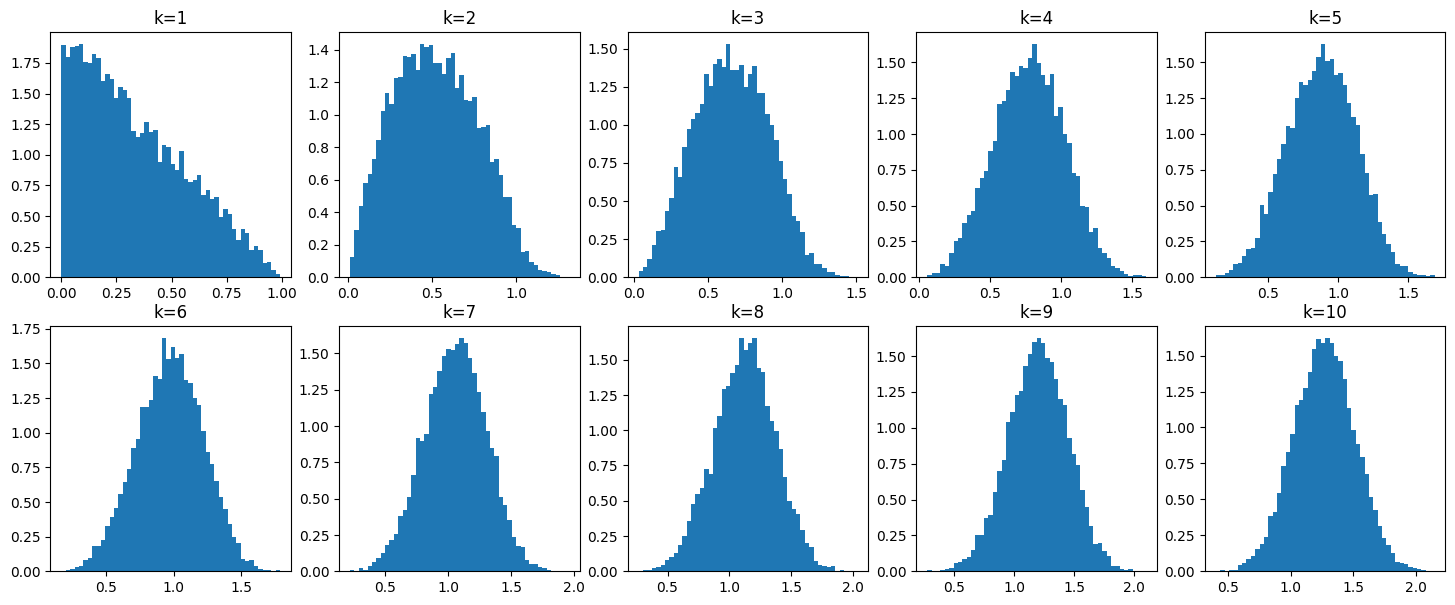

In [10]:
fg, ax = plt.subplots(2, 5, figsize=(18, 7))

ii, jj = 0, 0
for k in range(1, 11):
    N = 1000
    sig, uy, d = [], [], []
    for i in range(N):
        d = (distance_K(k))
        sig.append(np.std(d))
        uy.append(np.mean(d))

    mean_sig = np.mean(sig)
    mean_uy = np.mean(uy)

    print('k =', k, f"Ước lượng 𝜎 và 𝜇: {mean_sig:.4f}, {mean_uy:.4f}") 
    print('-----')

    ax[ii, jj].hist(d, bins=50, density=True)
    ax[ii, jj].set_title('k='+str(k))
    jj += 1
    if jj == 5:
        jj = 0 
        ii += 1

plt.show()

`Nhận xét`: 
- Giá trị sigma(𝜎) với k từ 1 đến 10 gần như tiến về bằng nhau. 
- Giá trị uy(𝜇) tăng dần khi k tăng từ 1 đến 10.  
- Phân phối của D chuyển dần về dạng của phân phối chuẩn khi k tăng từ 1 đến 10.

### Câu 3. (2 điểm) Cho 𝑈 ~ 𝒰(0, 1), dùng phương pháp Monte Carlo, tìm khoảng tin cậy 95% cho

#### a/ $Cor(𝑈, 𝑒^{𝑈})$. 

In [11]:
n = 1000
N = 1000
cor_a = []
for _ in range(N):
    X = np.random.uniform(0, 1, n)
    cor_a.append(np.corrcoef(X, np.exp(X))[0, 1])

mean = np.mean(cor_a)
sigma = np.std(cor_a)/np.sqrt(N)
print(f"Sai số chuấn: {sigma:.7f}")
print(f"Khoảng tin cậy 95%: [{mean - 2 * sigma}, {mean + 2 * sigma}]")

Sai số chuấn: 0.0000075
Khoảng tin cậy 95%: [0.9918272421019001, 0.9918572932191587]


#### b/ $Cor(𝑈, \sqrt{1 − U^2})$.

In [12]:
n = 1000
N = 1000
cor_b = []
for _ in range(N):
    X = np.random.uniform(0, 1, n)
    cor_b.append(np.corrcoef(X, np.sqrt(1 - X**2))[0, 1])

mean = np.mean(cor_b)
sigma = np.std(cor_b)/np.sqrt(N)

print(f"Sai số chuấn: {sigma:.7f}")
print(f"Khoảng tin cậy 95%: [{mean - 2 * sigma}, {mean + 2 * sigma}]")

Sai số chuấn: 0.0000860
Khoảng tin cậy 95%: [-0.9217379122977668, -0.9213938365108453]


### Câu 4. (2 điểm) Dùng 2 phương pháp giảm phương sai khác nhau để ước lượng giá trị 𝐼 ở Câu (1.a). Tính (hoặc ước lượng) tỉ lệ giảm phương sai so với phương pháp ở Câu (1.a).


#### Phương sai ở câu 1a

In [13]:
# sigma^2 = 1/2
N = 10000
X = np.random.normal(0, 1/np.sqrt(2), N)
J_hat = np.mean(np.abs(np.cos(X)))
I_hat = np.sqrt(np.pi)*J_hat
print(f"Uoc luong: {I_hat:.4f}")

var_1a = np.sqrt(np.pi)*np.var(np.abs(np.cos(X)))
print(f"Phuong sai: {var_1a:.4f}")

Uoc luong: 1.4030
Phuong sai: 0.1021


#### Phương pháp 1: Lấy mẫu quan trọng 
- Ta ước lượng tích phân theo các phân phối chuẩn thông dụng N(0, 1), N(0, 5)

##### Cách 1: Sử dụng mẫu theo phân phối chuẩn N(0, 1)
$I = \displaystyle\int_{-\infty}^{\infty} e^{-x^{2}}|cos(x)|dx 
= \sqrt{2\pi}\displaystyle\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}\frac{|cos(x)|}{e^{\frac{x^{2}}{2}}}dx 
= \sqrt{2\pi}\displaystyle\int_{-\infty}^{\infty}\frac{|cos(x)|}{e^{\frac{x^{2}}{2}}}f_x(x)dx 
= \sqrt{2\pi} E(\frac{|cos(x)|}{e^{\frac{x^{2}}{2}}}) ,\ với\  X \sim N(0, 1)$

$I \approx \sqrt{2\pi} * J ,\ với\  J = \frac{1}{n} \displaystyle\sum_{i=1}^{n}\frac{|cos(X_i)|}{e^{\frac{X_i^{2}}{2}}},\ X_1,...,X_n \sim N(0, 1)$

In [14]:
# sigma^2 = 1
N = 10000
X = np.random.normal(0, 1, N)

J_hat = np.mean(np.abs(np.cos(X))/np.exp(X**2/2))
I_hat = np.sqrt(2*np.pi)*J_hat
print(f"Uoc luong: {I_hat:.4f}")

var_c1 = np.sqrt(2*np.pi)*np.var(np.abs(np.cos(X))/np.exp(X**2/2))
print(f"Phuong sai: {var_c1:.4f}")
print(f"Tỷ lệ phương sai so với câu 1a: {var_c1/var_1a:.4f}")

Uoc luong: 1.3933
Phuong sai: 0.3129
Tỷ lệ phương sai so với câu 1a: 3.0651


##### Cách 2: Sử dụng mẫu theo phân phối N(0, 5)
$I = \displaystyle\int_{-\infty}^{\infty} e^{-x^{2}}|cos(x)|dx 
= \sqrt{10\pi}\displaystyle\int_{-\infty}^{\infty}\frac{1}{\sqrt{10\pi}}e^{\frac{-x^{2}}{10}}\frac{|cos(x)|}{e^{\frac{9x^{2}}{10}}}dx 
= \sqrt{10\pi}\displaystyle\int_{-\infty}^{\infty}\frac{|cos(x)|}{e^{\frac{9x^{2}}{10}}}f_x(x)dx 
= \sqrt{10\pi} E(\frac{|cos(x)|}{e^{\frac{9x^{2}}{10}}}) ,\ với\  X \sim N(0, 1)$

$I \approx \sqrt{10\pi} * J ,\ với\  J = \frac{1}{n} \displaystyle\sum_{i=1}^{n}\frac{|cos(X_i)|}{e^{\frac{9X_i^{2}}{10}}},\ X_1,...,X_n \sim N(0, 1)$

In [15]:
# sigma^2 = 5
N = 10000
X = np.random.normal(0, np.sqrt(5), N)

J_hat = np.mean(np.abs(np.cos(X))/np.exp((X**2)*9/10))
I_hat = np.sqrt(10*np.pi)*J_hat
print(f"Uoc luong: {I_hat:.4f}")

var_c2 = np.sqrt(10*np.pi)*np.var(np.abs(np.cos(X))/np.exp((X**2)*9/10))
print(f"Phuong sai: {var_c2:.4f}")
print(f"Tỷ lệ phương sai so với câu 1a: {var_c2/var_1a:.4f}")

Uoc luong: 1.3885
Phuong sai: 0.6692
Tỷ lệ phương sai so với câu 1a: 6.5549


#### Phương pháp 2: Biến đối nghịch
- Sử dụng câu 1a nhưng chỉ sinh 1 nữa biến ngẫu nhiên X, nữa còn lại cho bằng -X.

In [16]:
N = 5000
X = np.random.normal(0, 1/np.sqrt(2), N)
XX = np.concatenate((X, -X))
J_hat = np.mean(np.abs(np.cos(XX)))
I_hat = np.sqrt(np.pi)*J_hat
print(f"Uoc luong: {I_hat:.4f}")

var_c3 = np.sqrt(np.pi)*np.var(np.abs(np.cos(X)))
print(f"Phuong sai: {var_c3:.4f}")
print(f"Tỷ lệ phương sai so với câu 1a: {var_c3/var_1a:.4f}")

Uoc luong: 1.4062
Phuong sai: 0.1030
Tỷ lệ phương sai so với câu 1a: 1.0087


### Câu 5. (1 điểm) Thiết kế thuật toán hiệu quả để sinh điểm ngẫu nhiên trong hình sau

#### Cách giải: 
- Với mỗi cạnh của thập giác và đường tròn ta được một hình viên phân. 
- Ta lấy mẫu loại bỏ tạo hình viên phân bằng cách gieo các điểm trong hình chữ nhật bao 1 hình viên phân.
- Khi ấy ta dùng hai biến ngẫu nhiên (x, y) để lấy mẫu loại bỏ. Với x ta sinh theo chiều dài hình chữ nhật, với chữ số phần thập phân thứ 1 của biến y dùng để xác định nó nằm ở hình viên phân thứ mấy, biến y nhưng bỏ đi chữ số phần thập phân thứ nhất dùng để sinh theo chiều rộng hình chữ nhật.

-> Độ hiệu quả: dùng 2 biến ngẫu nhiên để lấy mẫu loại bỏ trong HCN bao hình viên phân và đồng thời chia các điểm vào hình viên phân.

In [17]:
# Tính chiều dài HCN
def tinh_d():
    hs = np.pi/180
    x = 2*(np.sin(18*hs))
    return x

tinh_d()

0.6180339887498948

In [18]:
# Tính chiều rộng HCN
def tinh_r():
    x = tinh_d()/2
    yy = np.sqrt(1 - x**2)
    return 1 - yy
tinh_r()

0.04894348370484647

In [19]:
def cau_5():
    x = tinh_d()
    y = tinh_r()
    
    while(True):
        X = np.random.rand()*x - x/2
        Y_r = np.random.rand()
        
        # lấy chữ số phần thập phân thứ nhất của biến Y
        choose_edge = math.floor(Y_r*10) + 1

        Y_r = Y_r*10 - (choose_edge - 1)
        Y = Y_r*y + (1-y)
        if Y*Y <= 1 - X*X:
            break

    r = np.sqrt(X*X + Y*Y)
    theta = np.arccos(X/np.sqrt(X**2+Y**2)) + choose_edge*np.pi/5

    return  r*math.cos(theta), r*math.sin(theta)

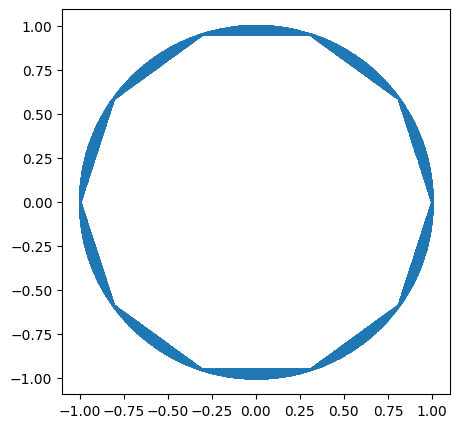

In [20]:
N = 100000
YY = []
XX = []
for i in range(N):
    tmp = cau_5()
    XX.append(tmp[0])
    YY.append(tmp[1])

plt.figure(figsize=(5, 5))
plt.scatter(XX, YY, s = 1)
plt.axis("equal")
plt.show()